# Banglore_Housing

In [33]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ssanto123/ML-Project/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/bengaluru_house_data.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "bengaluru_house_data.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [35]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "bengaluru_house_data.csv")
    return pd.read_csv(csv_path)

In [36]:
housing = load_housing_data()
housing.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [37]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [15]:
housing["total_sqft"].value_counts()

1200         843
1100         221
1500         205
2400         196
600          180
            ... 
1797           1
1189           1
1205.47        1
3537           1
854 - 960      1
Name: total_sqft, Length: 2117, dtype: int64

In [16]:
housing.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


NameError: name 'save_fig' is not defined

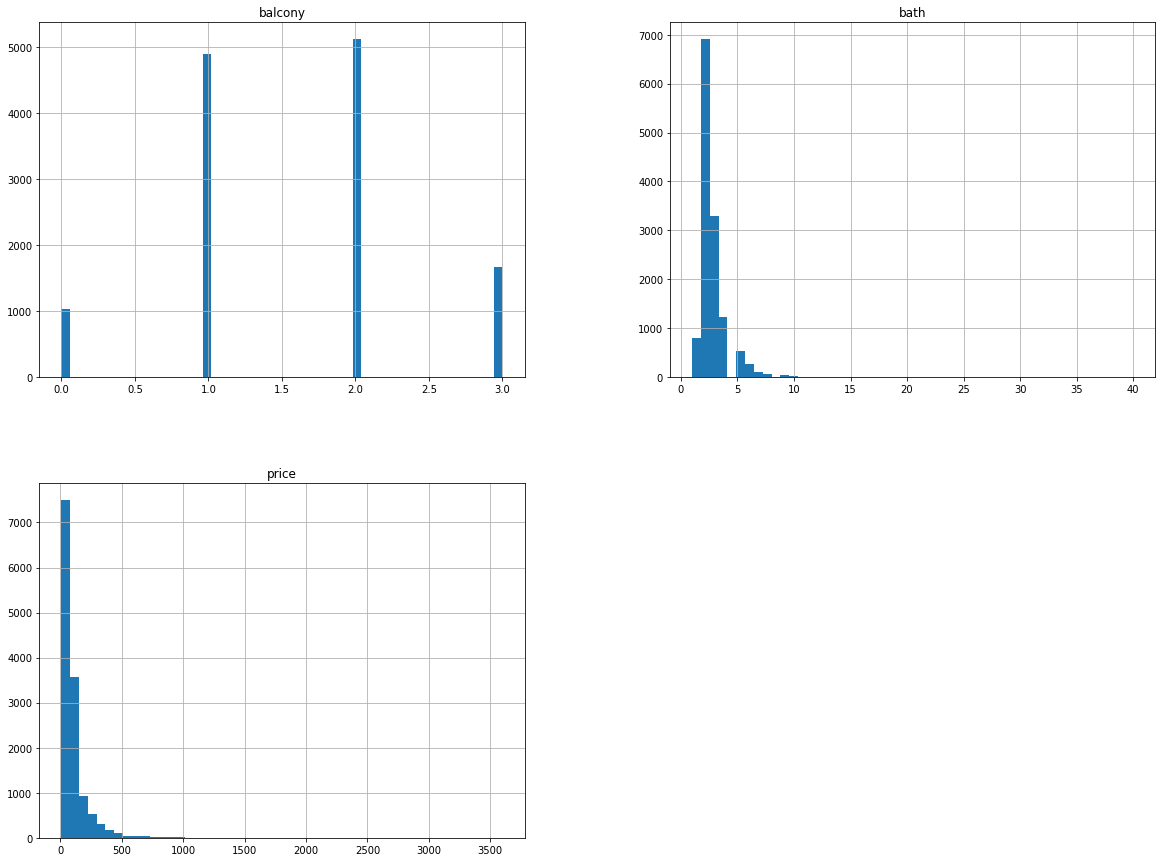

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [18]:
housing["location"].value_counts()

Whitefield                                  540
Sarjapur  Road                              399
Electronic City                             302
Kanakpura Road                              273
Thanisandra                                 234
                                           ... 
Banashankari 3rd stage, Vivekanandanagar      1
Vittal Mallya Road                            1
Thirumalashettyhally                          1
Amco Colony                                   1
B K Nagar                                     1
Name: location, Length: 1305, dtype: int64

In [19]:
housing.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


NameError: name 'save_fig' is not defined

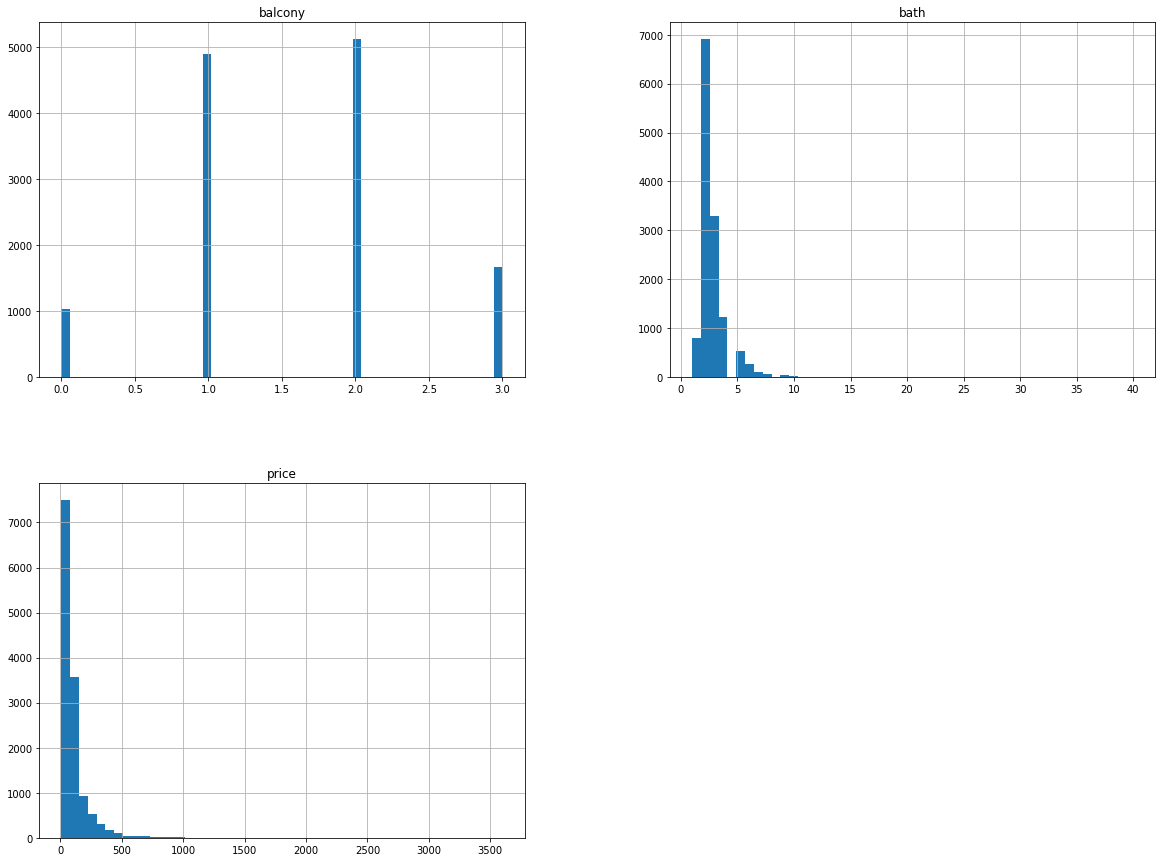

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [21]:
import numpy as np
np.random.seed(42)

In [22]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [23]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

10656 train + 2664 test


In [26]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [39]:
test_set.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
8077,Built-up Area,Ready To Move,Banjara Layout,2 Bedroom,NaN,1050,2.0,1.0,64.8
1602,Super built-up Area,Ready To Move,Rajiv Nagar,3 BHK,PuoodSk,1690,3.0,1.0,125.0
10498,Built-up Area,Ready To Move,Hebbal,2 BHK,NaN,1100,2.0,1.0,60.0
3297,Plot Area,Ready To Move,Munnekollal,6 Bedroom,NaN,1200,4.0,2.0,110.0
8893,Built-up Area,18-Apr,Choodasandra,4 Bedroom,LGifeew,2429,3.0,1.0,210.0


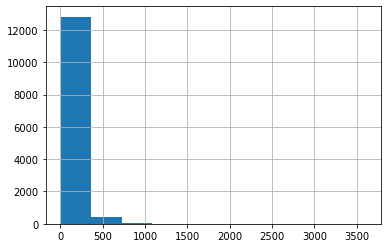

In [40]:
housing["price"].hist()

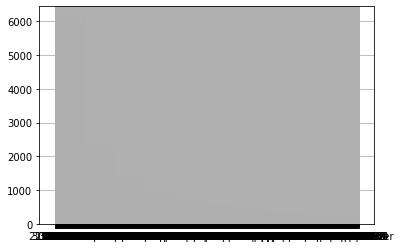

In [42]:
housing["total_sqft"].hist()

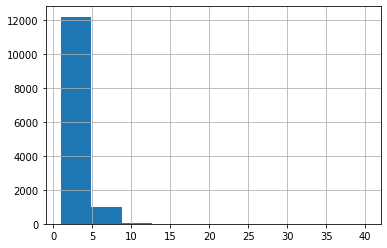

In [43]:
housing["bath"].hist()

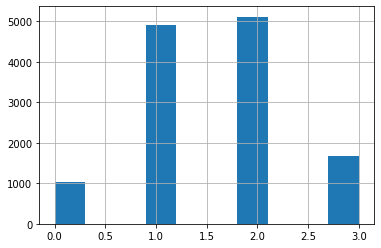

In [44]:
housing["balcony"].hist()

In [46]:
train_set.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
3411,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1530,2.0,2.0,90.0
9142,Super built-up Area,Ready To Move,Cooke Town,2 BHK,NaN,1310,2.0,2.0,111.0
1971,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,3 BHK,GrrvaGr,1530,3.0,2.0,57.0
2608,Plot Area,Ready To Move,Banashankari,4 Bedroom,NaN,2400,3.0,2.0,370.0
9635,Built-up Area,19-Dec,Kanakapura,2 BHK,GoityEt,1017,2.0,1.0,66.0


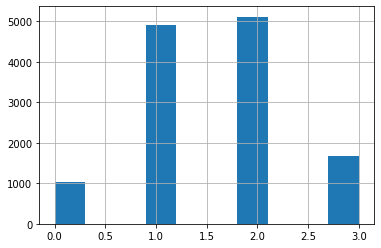

In [47]:
housing["balcony"].hist()

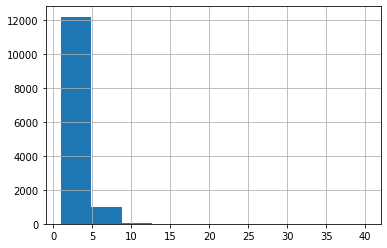

In [48]:
housing["bath"].hist()

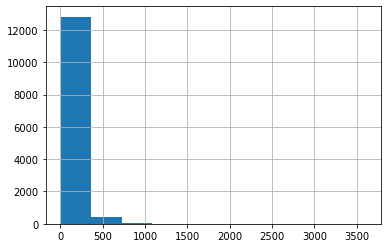

In [49]:
housing["price"].hist()

In [52]:
housing["price_cat"] = pd.cut(housing["price"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

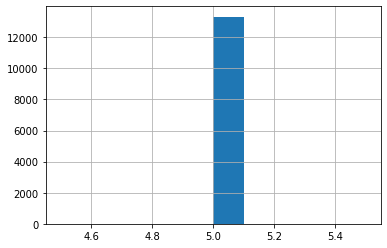

In [53]:
housing["price_cat"].hist()

In [55]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["price_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [56]:
strat_test_set["price_cat"].value_counts() / len(strat_test_set)

5    1.0
4    0.0
3    0.0
2    0.0
1    0.0
Name: price_cat, dtype: float64

In [58]:
housing["price_cat"].value_counts() / len(housing)

5    1.0
4    0.0
3    0.0
2    0.0
1    0.0
Name: price_cat, dtype: float64

In [59]:
def income_cat_proportions(data):
    return data["price_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [60]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.0,0.0,0.0,NaN,NaN
2,0.0,0.0,0.0,NaN,NaN
3,0.0,0.0,0.0,NaN,NaN
4,0.0,0.0,0.0,NaN,NaN
5,1.0,1.0,1.0,0.0,0.0
